In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Summary

The point of this notebook is to develop better tree rooting algorithms. Develop, because this will be messy for the time being and will eventually split into hopefully comprehensible code when the time arises.

In [64]:
from Bio import Phylo
import numpy as np
from scipy import stats

import ete3
from io import StringIO
import random
from scipy.optimize import minimize, minimize_scalar
from matplotlib import pyplot as plt

import glob
import pandas as pd

import copy

# Test my MP algorithm

I'm confident that it works, at least on the trees I've tested. But I really need to demonstrate that here.

Note that I've uncovered weird problems with the `root_at_midpoint()` method from `Bio.Phylo`, so I won't be trusting it as a positive control. Rather, should demonstrate that they are usually equivalent and when there are discrepancies my method produces the expected behavior (conserving branch length, for instance).

In [ ]:
import rooting_methods

In [ ]:
for input_tree in glob.glob('../Tria_et_al_data/cyanobacteria/ingroup/phyml/*.nwk')[:]:
    my_tree = Phylo.read(input_tree, 'newick', rooted=False)
    initial_terminals = my_tree.get_terminals()
    my_tree = rooting_methods.mp_root_adhock(my_tree)
    assert my_tree.is_bifurcating()
    my_bls = (my_tree.root.clades[0].branch_length, my_tree.root.clades[1].branch_length)
    my_bls = sorted(my_bls)
    phylo_tree = Phylo.read(input_tree, 'newick', rooted=False)
    phylo_tree.root_at_midpoint()
    phylo_bls = (phylo_tree.root.clades[0].branch_length, phylo_tree.root.clades[1].branch_length)
    phylo_bls = sorted(phylo_bls)

**Investigate example errors**

**The ete3 method is just plain wrong**

In [ ]:
# tree_loc = '../test.ete3.newick'
# # tree_loc = '/Users/adamhockenberry/Projects/Phylogenetic_couplings/scratch/current/1AOE_A_rp75.newick'
# tree = ete3.Tree(tree_loc)
# outgroup = tree.get_midpoint_outgroup()
# tree.set_outgroup(outgroup)
# tree.render('%%inline')

** Add in a comparison to DendroPy to be comprehensive **

# Testing method based off of minimizing the standard deviation in the distribution of root-to-tip distances

...this is surprisingly easy and seems like it should work great...I guess it's just the Min-var or MCCV method as it's called in the MAD paper? Not sure if maximizing the likelihood of a gaussian is the sme as minimizing the coefficient of variation but I'm kind of guessing yes. And in any event this code is easily adapted

In [ ]:
# def branch_search(bl, tree, node, terminal_list, non_terminal_list):
#     if node in terminal_list:
#         tree.root_with_outgroup(tree.root.clades[0].clades[0], outgroup_branch_length=10e-8)
#     else:
#         valid_terms = [term for term in terminal_list if term not in tree.find_any(node).clades][-1]
#         tree.root_with_outgroup(valid_terms, outgroup_branch_length=10e-8)
#     tree.root_with_outgroup(node, outgroup_branch_length=bl)
#     all_dists = [float(j) for i,j in tree.depths().items() if i in terminal_list]
#     mean, std = stats.norm.fit(all_dists)
#     return -np.sum(stats.norm.logpdf(all_dists, loc=mean, scale=std))

In [ ]:
# tree_loc = '../test.ete3.newick'
# # tree_loc = '/Users/adamhockenberry/Projects/Phylogenetic_couplings/scratch/current/1AOE_A_rp75.newick'
# ###Load the tree
# tree = Phylo.read(tree_loc, 'newick', rooted=False)
# for i, internal_node in enumerate(tree.get_nonterminals()):
#     internal_node.name = 'I{}'.format(i)
# print(tree.total_branch_length())
# # Phylo.draw(tree)

In [ ]:
# tree.root_at_midpoint()
# Phylo.draw(tree)
# print(tree.total_branch_length())
# print(tree.root.clades)

In [ ]:
# ###
# terminal_list = tree.get_terminals()
# non_terminal_list = tree.get_nonterminals()
# solutions = []
# for node in terminal_list:
#     if node.branch_length == None:
#         continue
# #     print('Name: ', node.name)
# #     print('This should be my max! :', node.branch_length)
#     bl_bounds = (10e-8, node.branch_length-10e-8)
#     res = minimize_scalar(branch_search, node.branch_length/2.,\
#                           args=(tree, node, terminal_list, non_terminal_list),\
#                           bounds=bl_bounds, method='bounded')
#     print(tree.total_branch_length())
# #     print('finished one!')
#     solutions.append((node, res.x, res.fun))
# print('starting tricky nonterms')
# # tree.root_with_outgroup([term for term in terminal_list if term not in node.clades][0], outgroup_branch_length=10e-8)
# # for node in non_terminal_list:
# #     if node.branch_length == None:
# #         continue
# #     print('Name: ', node.name)
# #     print('This should be my max! :', node.branch_length)
# #     bl_bounds = (10e-8, node.branch_length-10e-8)
# #     res = minimize_scalar(branch_search, node.branch_length/2.,\
# #                           args=(tree, node, terminal_list, non_terminal_list),\
# #                           bounds=bl_bounds, method='bounded')
# #     print(tree.total_branch_length())
# #     print('finished one!')
# #     solutions.append((node, res.x, res.fun))
# # #     print(node)
# # #     parent = tree.get_path(node)[-2]


# # #     print(node)
# # #     print(np.mean(all_dists), np.std(all_dists))
# # #     print(tree.root[0].get_terminals())

In [ ]:
# tree.find_any('I3').clades

In [ ]:
# tree.root_at_midpoint()
# Phylo.draw(tree)

In [ ]:
# solutions = sorted(solutions, key=lambda x: x[2])
# print(solutions[:10])

In [ ]:
# Phylo.draw(tree)
# print(tree.root.clades)

In [ ]:
# tree_loc = '../test.phylo.newick'
# tree = Phylo.read(tree_loc, 'newick', rooted=False)
# for clade in tree.get_nonterminals():
#     print(len(clade.clades))
# print([i for i in tree.get_terminals() if i.name == '6239'])
# tree.root_with_outgroup('6239', outgroup_branch_length=1.1544946848352169)

In [ ]:
# if solutions[0][0] not in tree.root.clades:
#     tree.root_with_outgroup(solutions[0][0], outgroup_branch_length=solutions[0][1])
# else:
#     tree.root_with_outgroup(solutions[10][0], outgroup_branch_length=10e-8)
#     tree.root_with_outgroup(solutions[0][0], outgroup_branch_length=solutions[0][1])
# # tree.root_with_outgroup(solutions[0][0])
# Phylo.draw(tree)

In [ ]:
# solutions[0]

In [ ]:
####THIS IS BROKEN
# def branch_scan(modifier, l_mp_dists, r_mp_dists):
#     temp_l_mp_dists = np.array(l_mp_dists) + modifier
#     temp_r_mp_dists = np.array(r_mp_dists) - modifier
#     all_dists = np.concatenate((temp_l_mp_dists, temp_r_mp_dists))
#     mean, std = stats.norm.fit(all_dists)
#     return -np.sum(stats.norm.logpdf(all_dists, loc=mean, scale=std))

# def recursive_tree_root(hypothetical_root, explored, function_optima, tree):
#     '''
#     '''
#     if len(hypothetical_root.clades) == 2:
#         l_clade, r_clade = hypothetical_root.clades      
#         #L clade first
#         if l_clade.branch_length > 0:
#             tree.root_with_outgroup(l_clade, outgroup_branch_length=0.)
#             res = optimize_root_loc_on_branch(tree)
#             function_optima.append((l_clade, res))
#             explored, function_optima = recursive_tree_root(l_clade, explored, function_optima, tree)
#         #R clade second
#         if r_clade.branch_length > 0:
#             tree.root_with_outgroup(r_clade, outgroup_branch_length=0.)
#             res = optimize_root_loc_on_branch(tree, left=False)
#             function_optima.append((r_clade, res))
#             explored, function_optima = recursive_tree_root(r_clade, explored, function_optima, tree)
        
#     elif len(hypothetical_root.clades) == 1:
#         l_clade = hypothetical_root.clades[0]
#         if l_clade.branch_length > 0:
#             tree.root_with_outgroup(l_clade, outgroup_branch_length=0.)
#             res = optimize_root_loc_on_branch(tree)
#             function_optima.append((l_clade, res))
#             explored, function_optima = recursive_tree_root(l_clade, explored, function_optima, tree)
    
#     elif len(hypothetical_root.clades) == 0:
#         explored.append(hypothetical_root)
#         return explored, function_optima
    
#     else:
#         print('Some big error here with the number of clades stemming from this root')
#     explored.append(hypothetical_root)
#     return explored, function_optima

# def optimize_root_loc_on_branch(tree, left=True):
#     '''
#     This will be made much much much faster if I can avoid the step of getting the depths
#     of all terminals by passing an argument as a modifier allowing me to do it once at the beginning
#     and then calling it a day by adding/subtracting from this array
#     '''
#     ###for a hypothetical root
#     assert len(tree.root.clades) == 2
#     if left:
#         lterms = tree.root.clades[0].get_terminals()
#         rterms = tree.root.clades[1].get_terminals()
#         all_depths = tree.depths().items()
#         lterm_dists = [float(j) for i,j in all_depths if i in lterms]
#         rterm_dists = [float(j) for i,j in all_depths if i in rterms]
#         current_loc = tree.root.clades[0].branch_length
#         max_bound = tree.root.clades[1].branch_length
#         bl_bounds = np.array([[-current_loc, max_bound]])
#     else:
#         rterms = tree.root.clades[0].get_terminals()
#         lterms = tree.root.clades[1].get_terminals()
#         all_depths = tree.depths().items()
#         lterm_dists = [float(j) for i,j in all_depths if i in lterms]
#         rterm_dists = [float(j) for i,j in all_depths if i in rterms]
#         current_loc = tree.root.clades[1].branch_length
#         max_bound = tree.root.clades[0].branch_length
#         bl_bounds = np.array([[current_loc, max_bound]])
# #         bl_bounds = np.array([[-current_loc, max_bound]])
#     res = minimize(branch_scan, np.array(0.),\
#                           args=(lterm_dists, rterm_dists),\
#                           bounds=bl_bounds, method='SLSQP')
# #     res = minimize(branch_scan, np.array(0.),\
# #                           args=(lterm_dists, rterm_dists),\
# #                           bounds=bl_bounds, method='L-BFGS-B')
#     return res

# def max_likelihood_root(tree):
#     explored, function_optima = recursive_tree_root(tree.root, [], [], tree)
#     function_optima = sorted(function_optima, key=lambda x: x[1].fun)
#     tree.root_with_outgroup(function_optima[1][0], outgroup_branch_length=0.)
# #     assert tree.root.clades[1].branch_length == 0.
# #     tree.root.clades[0].branch_length += function_optima[1][1].x[0]
# #     tree.root.clades[1].branch_length -= function_optima[1][1].x[0]
#     return tree, function_optima

In [ ]:
###This should work
# def branch_scan(modifier, ds_dists, us_dists):
#     temp_ds_dists = ds_dists + modifier
#     temp_us_dists = us_dists - modifier
#     all_dists = np.concatenate((temp_ds_dists, temp_us_dists))
#     mean, std = stats.norm.fit(all_dists)
#     return -np.sum(stats.norm.logpdf(all_dists, loc=mean, scale=std))

# def update_depth_df_dict(my_clade, parent_clade, depths_dict):
#     downstream_terms = [i.name for i in my_clade.get_terminals()]
#     upstream_terms = list(set(list(depths_dict[parent_clade].index)) - set(downstream_terms))
#     depths_dict[my_clade] = depths_dict[parent_clade].copy(deep=True)
#     depths_dict[my_clade].loc[downstream_terms, 'depth'] -= my_clade.branch_length
    

#     depths_dict[my_clade].loc[upstream_terms, 'depth'] += my_clade.branch_length
#     return depths_dict, downstream_terms, upstream_terms

# def recursive_tree_root(hypothetical_root, explored, function_optima, depths_dict, tree):
#     '''
#     '''
#     if len(hypothetical_root.clades) == 2:
#         l_clade, r_clade = hypothetical_root.clades 
#         l_bl = l_clade.branch_length
#         r_bl = r_clade.branch_length
#         #L clade first
#         if l_bl > 0:
#             depths_dict, downstream_terms, upstream_terms = update_depth_df_dict(l_clade, hypothetical_root, depths_dict)
#             res = optimize_root_loc_on_branch(l_clade, depths_dict[l_clade], downstream_terms, upstream_terms)
#             function_optima.append((l_clade, res))
#             explored, function_optima, depths_dict = recursive_tree_root(l_clade, explored, function_optima, depths_dict, tree)
#         #R clade second
#         if r_clade.branch_length > 0:
#             depths_dict, downstream_terms, upstream_terms = update_depth_df_dict(r_clade, hypothetical_root, depths_dict)
#             res = optimize_root_loc_on_branch(r_clade, depths_dict[r_clade], downstream_terms, upstream_terms)
#             function_optima.append((r_clade, res))
#             explored, function_optima, depths_dict = recursive_tree_root(r_clade, explored, function_optima, depths_dict, tree)
        
#     elif len(hypothetical_root.clades) == 1:
#         l_clade = hypothetical_root.clades[0]
#         l_bl = l_clade.branch_length
#         if l_clade.branch_length > 0:
#             depths_dict, downstream_terms, upstream_terms = update_depth_df_dict(l_clade, hypothetical_root, depths_dict)
#             res = optimize_root_loc_on_branch(l_clade, depths_dict[l_clade], downstream_terms, upstream_terms)
#             function_optima.append((l_clade, res))
#             explored, function_optima, depths_dict = recursive_tree_root(l_clade, explored, function_optima, depths_dict, tree)
    
#     elif len(hypothetical_root.clades) == 0:
#         explored.append(hypothetical_root)
#         return explored, function_optima, depths_dict
    
#     else:
#         print('Some big error here with the number of clades stemming from this root')
#     explored.append(hypothetical_root)
#     return explored, function_optima, depths_dict

# def optimize_root_loc_on_branch(clade, depths_df, downstream_terms, upstream_terms):
#     '''
#     '''
#     downstream_dists = np.array(depths_df.loc[downstream_terms, 'depth'])
#     upstream_dists = np.array(depths_df.loc[upstream_terms, 'depth'])
#     bl_bounds = np.array([[0., clade.branch_length]])
#     res = minimize(branch_scan, np.array(np.mean(bl_bounds)),\
#                           args=(downstream_dists, upstream_dists),\
#                           bounds=bl_bounds, method='SLSQP')
# #     res = minimize(branch_scan, np.array(0.),\
# #                           args=(downstream_dists, upstream_dists),\
# #                           bounds=bl_bounds, method='L-BFGS-B')
#     return res

# def max_likelihood_root(tree):
#     depths_dict = {}
#     initial_depths = tree.root.depths()
#     terminal_depths_df = pd.DataFrame()
#     terminal_depths_df['depth'] = np.nan
#     for term in tree.get_terminals():
#         terminal_depths_df.set_value(term.name, 'depth', initial_depths[term])
#     depths_dict[tree.root] = terminal_depths_df
#     explored, function_optima, depths_dict = recursive_tree_root(tree.root, [], [], depths_dict, tree)
#     function_optima = sorted(function_optima, key=lambda x: x[1].fun)
#     tree.root_with_outgroup(function_optima[0][0], outgroup_branch_length=0.)
#     assert tree.root.clades[1].branch_length == 0.
#     tree.root.clades[0].branch_length -= function_optima[0][1].x[0]
#     tree.root.clades[1].branch_length += function_optima[0][1].x[0]
#     return tree, function_optima, depths_dict

# Testing systematically

In [ ]:
id_species_dict = {}
with open('../Tria_et_al_data/eukaryotes/ID_to_Species.txt', 'r') as infile:
    texty = infile.readlines()
    for line in texty[1:]:
        sl = line.split('\t')
        id_species_dict[sl[0]] = sl[1]
print(len(id_species_dict.keys()))

species_seqid_dict = {}
with open('../Tria_et_al_data/eukaryotes/cluster_to_seqid.txt', 'r') as infile:
    texty = infile.readlines()
    for line in texty:
        sl = line.split('\t')
        if sl[0] == 'KOG0725':
            species_seqid_dict[sl[1]] = sl[2].strip()
print(len(species_seqid_dict.keys()))

In [ ]:

# fungi = ['13684', ]
# id_species_dict

** test monophyly **

In [ ]:
def recursive_tree_monophyly(hypothetical_root, tree, test_set, is_mono):
    if tree.is_monophyletic(test_set):
        is_mono = True
    if len(hypothetical_root.clades) == 2:
        l_clade, r_clade = hypothetical_root.clades
        if l_clade.branch_length > 0:
            tree.root_with_outgroup(l_clade, outgroup_branch_length=10e-10)
            is_mono = recursive_tree_monophyly(l_clade, tree, test_set, is_mono)
            is_mono = recursive_tree_monophyly(r_clade, tree, test_set, is_mono)
        elif r_clade.branch_length > 0:
            tree.root_with_outgroup(r_clade, outgroup_branch_length=10e-10)
            is_mono = recursive_tree_monophyly(l_clade, tree, test_set, is_mono)
            is_mono = recursive_tree_monophyly(r_clade, tree, test_set, is_mono)
    elif len(hypothetical_root.clades) == 1:
        l_clade = hypothetical_root.clades[0]
        if l_clade.branch_length > 0:
            tree.root_with_outgroup(l_clade, outgroup_branch_length=10e-10)
            is_mono = recursive_tree_monophyly(l_clade, tree, test_set, is_mono)
    elif len(hypothetical_root.clades) == 0:
        return is_mono
    return is_mono

# tree.get_terminals()
# tree.is_monophyletic(metazoa)
tree = Phylo.read('../test.ete3.newick', 'newick', rooted=False)
tree = mp_root_adhock(tree)
# tree.is_monophyletic([term for term in tree.get_terminals() if\
#                       term.name in ['7165', '7425', '7460', '121225', '7227', '6239']])

In [ ]:
testy = [term for term in tree.get_terminals() if\
                      term.name in metazoa]
recursive_tree_monophyly(tree.root, tree, testy, False)

In [ ]:
Phylo.draw(tree)

In [ ]:
metazoa = ['10090', '121225', '9606', '30611', '8364', '7955', '8128', '8090',\
          '7668', '7460', '7425', '7227', '7165', '6239']
problematic = ['../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG3467.faa.aln.nwk',\
              '../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG2866.faa.aln.nwk']

trees_dir = '../Tria_et_al_data/eukaryotes/ingroup/phyml/*.nwk'
ideal_species_number = 31

# n_pruned = 15
# trees_dir = '../Tria_et_al_data/eukaryotes/ingroup/phyml/*.{}.pruned'.format(n_pruned)
# problematic = [i+'.{}.pruned'.format(n_pruned) for i in problematic]
# # problematic += ['../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG2688.faa.aln.nwk.6.pruned']
# problematic += ['../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG3887.faa.aln.nwk.15.pruned']
# problematic += ['../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG1374.faa.aln.nwk.15.pruned']
# problematic += ['../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG1558.faa.aln.nwk.15.pruned']
# problematic += ['../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0284.faa.aln.nwk.15.pruned']
# problematic += ['../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0594.faa.aln.nwk.15.pruned']
# ideal_species_number = 31-n_pruned


# trees_dir = ['../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0725.faa.aln.nwk']
mp_success_rate = 0
ml_success_rate = 0
mad_success_rate = 0
attempts = 0
for tree_loc in glob.glob(trees_dir)[:50]:
    if tree_loc in problematic:
        continue
    print('######## {}'.format(tree_loc))
    tree = Phylo.read(tree_loc, 'newick')
    if len(tree.get_terminals()) != ideal_species_number:
        continue
        
    try:
        mad_tree = Phylo.read(tree_loc+'.rooted', 'newick', rooted=True)
    except ValueError:
        print('MAD did not work here')
        continue

    testy = [term for term in tree.get_terminals() if\
                      term.name in metazoa]
    rooted_tree = mp_root_adhock(tree)
    valid = recursive_tree_monophyly(rooted_tree.root, rooted_tree, testy, False)
    if valid:
        attempts += 1
        ###Mid point
        mp_tree = mp_root_adhock(tree)
        if set(testy) == set(mp_tree.root.clades[0].get_terminals()) or \
            set(testy) == set(mp_tree.root.clades[1].get_terminals()):
                mp_success_rate += 1
        ###ML        
        ml_tree = max_likelihood_root(tree)
        if set(testy) == set(ml_tree.root.clades[0].get_terminals()) or \
            set(testy) == set(ml_tree.root.clades[1].get_terminals()):
                ml_success_rate += 1
        ###MAD
        testy = [term for term in mad_tree.get_terminals() if\
                      term.name in metazoa]
        if set(testy) == set(mad_tree.root.clades[0].get_terminals()) or \
            set(testy) == set(mad_tree.root.clades[1].get_terminals()):
                mad_success_rate += 1
#     tree.root_at_midpoint()
#     print(min([term.branch_length for term in tree.get_terminals()]))
#     print(recursive_tree_monophyly(tree.root, tree, testy, False))
    print(mp_success_rate, mad_success_rate)


    

In [ ]:
mp_success_rate / attempts, ml_success_rate / attempts, mad_success_rate / attempts

In [ ]:
# Phylo.draw(tree)
# Phylo.draw(mp_tree)
# Phylo.draw(ml_tree)
# Phylo.draw(mad_tree)

In [ ]:
mp_success_rate, ml_success_rate, mad_success_rate, attempts

In [ ]:
tree_loc = '../Tria_et_al_data/eukaryotes/ingroup/phyml/KOG3467.faa.aln.nwk'
tree = Phylo.read(tree_loc, 'newick')

# tree.root_at_midpoint()
tree = mp_root_adhock(tree)
Phylo.draw(tree)

In [ ]:
# testy = [term for term in tree.get_terminals() if\
#                       term.name in metazoa]
recursive_tree_monophyly(tree.root, tree, testy, False)

In [ ]:
tree.get_terminals()

# A weighted MaxLik implementation

In [11]:
from Bio import Phylo
import rooting_methods

import pandas as pd
import numpy as np

from scipy.optimize import minimize
from scipy import stats

In [13]:
import sys
sys.path.append('../../Tree_weighting/Code/')
import weighting_methods

In [832]:
# def ml_root_weighted(tree):
#     ###Depths are important! This is what I am trying to optimize in terms
#     ###of making these look as close to normal as possible. So this gets the
#     ###starting depths as a DataFrame and subsequent tree crawling adds/subtracts
#     ###to these values
#     initial_depths = tree.root.depths()
#     terminal_depths_df = pd.DataFrame()
#     terminal_depths_df['depth'] = np.nan
#     for term in tree.get_terminals():
#         terminal_depths_df.set_value(term.name, 'depth', initial_depths[term])
#     depths_dict = {}
#     depths_dict[tree.root] = terminal_depths_df
    
#     ###Getting starting weights
#     weights_dict_single = weighting_methods.GSC_adhock_extended(tree)
#     weights_dict_all = {}
#     weights_dict_all[tree.root] = weights_dict_single

#     explored, function_optima, depths_dict, weights_dict =\
#             recursive_crawl_ml(tree.root, [], [], depths_dict, weights_dict_all, tree)
    
#     ###Getting the best function eval and rooting there
#     function_optima = sorted(function_optima, key=lambda x: x[1].fun)
#     tree.root_with_outgroup(function_optima[0][0], outgroup_branch_length=0.)
#     assert tree.root.clades[1].branch_length == 0.
#     assert tree.root.clades[1] == function_optima[0][0]
#     tree.root.clades[0].branch_length -= function_optima[0][1].x[0]
#     tree.root.clades[1].branch_length += function_optima[0][1].x[0]
#     return tree, function_optima, depths_dict, weights_dict

# def recursive_crawl_ml(hypothetical_root, explored, function_optima, depths_dict, weights_dict, tree):
#     if len(hypothetical_root.clades) == 2:
#         l_clade, r_clade = hypothetical_root.clades
#         l_bl = l_clade.branch_length
#         r_bl = r_clade.branch_length
#         #L clade first
#         if l_bl > 0:
#             depths_dict, downstream_terms, upstream_terms =\
#                     update_depth_df_dict(depths_dict, l_clade, hypothetical_root)
#             weights_dict =\
#                     update_weights_dict(weights_dict, l_clade, hypothetical_root, downstream_terms, upstream_terms)
#             res = optimize_root_loc_on_branch(l_clade, depths_dict[l_clade], weights_dict[l_clade], downstream_terms, upstream_terms)
#             function_optima.append((l_clade, res))
#             explored, function_optima, depths_dict, weights_dict =\
#                     recursive_crawl_ml(l_clade, explored, function_optima, depths_dict, weights_dict, tree)
#         #R clade second
#         if r_bl > 0:
#             depths_dict, downstream_terms, upstream_terms =\
#                     update_depth_df_dict(depths_dict, r_clade, hypothetical_root)
#             weights_dict =\
#                     update_weights_dict(weights_dict, r_clade, hypothetical_root, downstream_terms, upstream_terms)
#             res = optimize_root_loc_on_branch(r_clade, depths_dict[r_clade], weights_dict[r_clade], downstream_terms, upstream_terms)
#             function_optima.append((r_clade, res))
#             explored, function_optima, depths_dict, weights_dict =\
#                     recursive_crawl_ml(r_clade, explored, function_optima, depths_dict, weights_dict, tree)
#     elif len(hypothetical_root.clades) == 0:
#         explored.append(hypothetical_root)
#         return explored, function_optima, depths_dict, weights_dict
    
#     else:
#         print('Some big error here with the number of clades stemming from this root')
#     explored.append(hypothetical_root)
#     return explored, function_optima, depths_dict, weights_dict

# def update_depth_df_dict(depths_dict, my_clade, parent_clade):
#     downstream_terms = [i.name for i in my_clade.get_terminals()]
#     upstream_terms = list(set(list(depths_dict[parent_clade].index)) - set(downstream_terms))
#     depths_dict[my_clade] = depths_dict[parent_clade].copy(deep=True)
#     depths_dict[my_clade].loc[downstream_terms, 'depth'] -= my_clade.branch_length
#     depths_dict[my_clade].loc[upstream_terms, 'depth'] += my_clade.branch_length
#     return depths_dict, downstream_terms, upstream_terms

# def update_weights_dict(weights_dict, my_clade, parent_clade, downstream_terms, upstream_terms):
#     '''
#     Some convoluted copy things happening here that should be double checked
#     '''
#     weights_dict[my_clade] = copy.copy(weights_dict[parent_clade])
#     trashy = 0
#     temp_ds = [next(tree.find_elements(term)) for term in downstream_terms]
#     for term in temp_ds:
#         trashy += weights_dict[my_clade][term][-1]
#         weights_dict[my_clade][term] = weights_dict[my_clade][term][:-1]
#     bl_to_disperse = my_clade.branch_length
#     temp_us = [next(tree.find_elements(i)) for i in upstream_terms]
#     to_divide = np.sum([weights_dict[my_clade][term][-1] for term in temp_us])
#     for term in temp_us:
#         weights_dict[my_clade][term] = weights_dict[my_clade][term] + [weights_dict[my_clade][term][-1] +\
#                                             weights_dict[my_clade][term][-1]/to_divide*bl_to_disperse]       
#     return weights_dict

# def optimize_root_loc_on_branch(my_clade, depths_df, weights_dict, downstream_terms, upstream_terms):
#     '''
#     '''    
# #     print('####')


#     downstream_dists = np.array(depths_df.loc[downstream_terms, 'depth'])
#     downstream_weights = np.array([weights_dict[next(tree.find_elements(i))][-1] for i in downstream_terms])

#     upstream_dists = np.array(depths_df.loc[upstream_terms, 'depth'])
#     upstream_weights = np.array([weights_dict[next(tree.find_elements(i))][-1] for i in upstream_terms])
#     old_upstream_weights = np.array([weights_dict[next(tree.find_elements(i))][-2] for i in upstream_terms])
#     bl_bounds = np.array([[0., my_clade.branch_length]])
#     ###Valid options for method are L-BFGS-B, SLSQP and TNC
#     res = minimize(branch_scan_ml, np.array(np.mean(bl_bounds)),\
#                           args=(downstream_dists, upstream_dists,\
#                                 downstream_weights, upstream_weights, old_upstream_weights),\
#                           bounds=bl_bounds, method='SLSQP')
# #     print(res)
#     return res

# def branch_scan_ml(modifier, ds_dists, us_dists, ds_weights, us_weights, old_us_weights):
#     temp_ds_dists = ds_dists + modifier
#     temp_us_dists = us_dists - modifier
#     all_dists = np.concatenate((temp_ds_dists, temp_us_dists))
    
#     total_ds = np.sum(ds_weights)
#     if total_ds != 0:
#         temp_ds_weights = ds_weights + (ds_weights/total_ds*modifier)
#     else:
#         temp_ds_weights = ds_weights + modifier


#     total_us = np.sum(old_us_weights)
#     if total_us != 0:
#         temp_us_weights = us_weights - (old_us_weights/total_us*modifier)
#     else:
#         temp_us_weights = us_weights - modifier
# #     all_weights = np.array([1 for i in range(all_dists.shape[0])])
#     all_weights = np.concatenate((temp_ds_weights, temp_us_weights))
# #     print(all_weights)
#     dsw = DescrStatsW(all_dists, all_weights)
#     return dsw.std

In [838]:
import rooting_methods_weighted

In [848]:
# tree = Phylo.read('../../Phylogenetic_couplings/Data/psicov150_aln_pdb/raw_trees/1a3aA.newick', 'newick')
tree = Phylo.read('/Users/adamhockenberry/Downloads/BM_Folder/paper_tree.txt', 'newick')
# tree = Phylo.read(StringIO('(((A:20, B:20):30,C:50):30, D:80)'), 'newick', rooted=False)
# tree = Phylo.read('../../Tree_rooting/Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0007.faa.aln.nwk', 'newick')
# Phylo.draw(tree)
# tree.root_with_outgroup('A', outgroup_branch_length=10e-8)
# C = next(tree.find_elements('C'))
# C.branch_length = 40
tree.root_with_outgroup('MAL')
# noi = next(tree.find_elements('PV22'))
# noi.branch_length += 20
# Phylo.draw(tree)

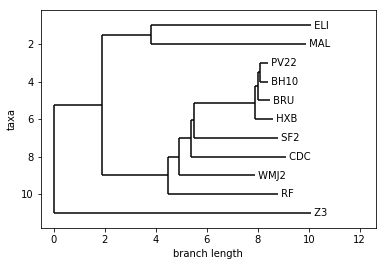

[(None, 1.9000000000000004), ('Z3', 10.1)]


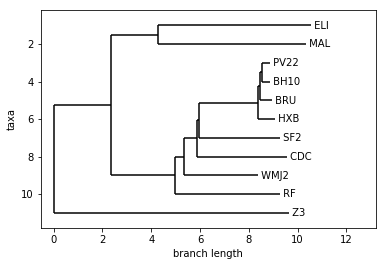

[(None, 2.3578678823546912), ('Z3', 9.6421321176453088)]


In [849]:
tree = rooting_methods.mp_root_adhock(tree)
Phylo.draw(tree)
print([(i.name, i.branch_length) for i in tree.root.clades])
tree, a, b, c = rooting_methods_weighted.ml_root_weighted(tree)
Phylo.draw(tree)
print([(i.name, i.branch_length) for i in tree.root.clades])

In [813]:
%%timeit
ml_root_weighted(tree)

1 loops, best of 3: 595 ms per loop


In [492]:
print(tree.root.clades[1].get_terminals())

[Clade(branch_length=2.3086, name='284593'), Clade(branch_length=1.1719, name='4950'), Clade(branch_length=1.5555, name='381046'), Clade(branch_length=1.5196, name='284590')]


In [402]:
for key,val in c.items():
    print('#####')
    print(key)
    print(val)

#####
ELI
{Clade(branch_length=3.7, name='CDC'): [0.0, 0.0, 0.0, 0.0, 0.0, 3.7, 3.8608695652173917, 3.9142028985507249, 4.2045582284999634, 4.4374637863468998, 5.0983626481432465], Clade(branch_length=6.1, name='MAL'): [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.1, 7.0085106382978717], Clade(branch_length=3.3, name='SF2'): [0.0, 0.0, 0.0, 0.0, 3.3, 3.3428571428571425, 3.4106832298136642, 3.4640165631469975, 3.754371893096236, 3.9623400154543367, 4.552475762436897], Clade(branch_length=0.5, name='BRU'): [0.0, 0.0, 0.5, 0.54166666666666663, 1.0616666666666665, 1.0759523809523808, 1.1437784679089025, 1.1971118012422357, 1.4874671311914742, 1.5698632696539758, 1.8036726927939297], Clade(branch_length=4.3, name='RF'): [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.3, 4.8675126903553299, 5.1371416732030015, 5.9022478798502567], Clade(branch_length=0.3, name='PV22'): [0.0, 0.3, 0.34999999999999998, 0.37916666666666665, 0.89916666666666667, 0.9134523809523809, 0.98127846790890261, 1.0346118012422358, 1.32496

In [443]:
a

[(Clade(name='284593'),
        fun: 0.27310977658162072
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.12242843])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 10
      nit: 2
   status: 0
  success: True
        x: array([ 0.])),
 (Clade(branch_length=1.5196, name='284590'),
        fun: 0.28008028475757918
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.13053649])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 10
      nit: 2
   status: 0
  success: True
        x: array([ 0.])),
 (Clade(branch_length=1.5555, name='381046'),
        fun: 0.29495960117964437
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.12736434])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 10
      nit: 2
   status: 0
  success: True
        x: array([ 0.])),
 (Clade(branch_length=0.32614),
        fun: 0.29969491614164467
 hess_inv: <1x1 Lbfgs

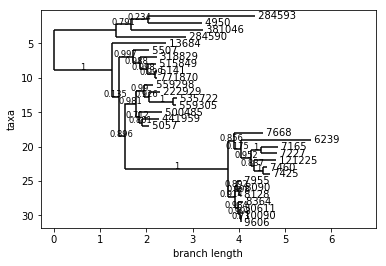

In [611]:
# tree = Phylo.read('../../Tree_rooting/Tria_et_al_data/eukaryotes/ingroup/phyml/KOG0007.faa.aln.nwk', 'newick')
# tree = rooting_methods.mp_root_adhock(tree)
# Phylo.draw(tree)
tree,a,b = rooting_methods.ml_root_adhock(tree)
Phylo.draw(tree)

In [612]:
print([(i.name, i.branch_length) for i in tree.root.clades])

[(None, 1.3427466101027199), (None, 1.26665338989728)]


In [474]:
testy = [val for key, val in tree.depths().items() if key in tree.get_terminals()]

In [475]:
print(np.std(testy), np.mean(testy), np.std(testy)/np.mean(testy))
print(-np.sum(stats.norm.logpdf(testy, loc=np.mean(testy), scale=np.std(testy))))

1.07297489653 3.40675614942 0.314955003961
46.1705816308


In [468]:
print(np.std(testy), np.mean(testy), np.std(testy)/np.mean(testy))
print(-np.sum(stats.norm.logpdf(testy, loc=np.mean(testy), scale=np.std(testy))))

1.07297489653 3.4067561544 0.314955003501
46.1705816308


In [472]:
print(np.std(testy), np.mean(testy), np.std(testy)/np.mean(testy))
print(-np.sum(stats.norm.logpdf(testy, loc=np.mean(testy), scale=np.std(testy))))

2.00078394421 7.14004442581 0.280220097368
65.4868058811


0.28022009736777487

In [267]:
from statsmodels.stats.weightstats import DescrStatsW
arr = np.arange(-5, 5)
weights = np.arange(9, -1, -1)  # Same size as arr
print(arr, weights)
dsw = DescrStatsW(arr, weights)
cv = dsw.std / abs(dsw.mean)  # weighted std / abs of weighted mean
print(cv)

[-5 -4 -3 -2 -1  0  1  2  3  4] [9 8 7 6 5 4 3 2 1 0]
0.947607082959


In [42]:
from matplotlib import pyplot as plt

In [35]:
import statsmodels.api as sm

In [40]:
sm.stats.DescrStatsW.mean()

from statsmodels.stats.weightstats import DescrStatsW

cv = dsw.std / abs(dsw.mean)  # weighted std / abs of weighted mean

print(cv)
1.6583123951777001



weighted_stats = DescrStatsW(array, weights=weights, ddof=0)
>>> weighted_stats.std       


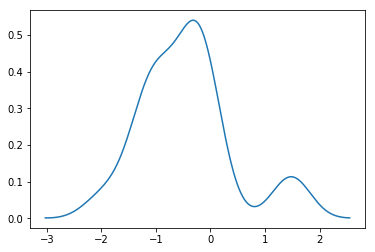

In [43]:
fig, ax = plt.subplots(1, )
ax.plot(testy.support, testy.density)